In [1]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")
model.invoke("안녕!")

AIMessage(content='안녕하세요! 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 10, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CAGFfP0swE0UV28oNdWMFjh1d8WEm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d9b0fc2c-03c4-4cb4-9c96-577fd27cefc6-0', usage_metadata={'input_tokens': 10, 'output_tokens': 10, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [3]:
from typing import Annotated # 타입 힌트 사용을 위한 모듈
from typing_extensions import TypedDict # 딕셔너리 타입 정의를 위한 모듈

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list[str], add_messages]

graph_builder = StateGraph(State)

In [4]:
def generate(state: State):
    """
    주어진 상태를 기반으로 챗봇의 응답 메시지를 생성합니다.
    """
    return {"messages": [model.invoke(state["messages"])]}

graph_builder.add_node("generate", generate)

In [5]:
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()


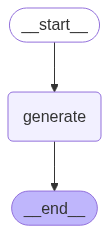

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass


In [7]:
response = graph.invoke({"messages": ["안녕! 아직 저녁식사를 안했는데 시간이 늦었어. 뭘 먹으면 좋을까?"]})
print(type(response))
response

<class 'dict'>


{'messages': [HumanMessage(content='안녕! 아직 저녁식사를 안했는데 시간이 늦었어. 뭘 먹으면 좋을까?', additional_kwargs={}, response_metadata={}, id='cfcab786-31de-4c43-a6ba-21fdb72bc55d'),
  AIMessage(content='안녕! 저녁식사로는 간단하면서도 맛있는 음식을 선택하는 게 좋겠네. 다음과 같은 몇 가지 아이디어가 있어:\n\n1. **볶음밥**: 냉장고에 있는 채소나 고기를 넣어서 간편하게 만들 수 있어.\n2. **샐러드**: 신선한 채소와 함께 치킨이나 통곡물(퀴노아 등)을 더하면 영양가 높은 한 끼가 돼.\n3. **국수**: 간단하게 끓일 수 있는 국수에 좋아하는 소스를 곁들여 먹어도 좋아.\n4. **토스트**: 식빵에 각종 재료를 넣고 구워서 샌드위치를 만들어보는 것도 괜찮아.\n5. **스프**: 빠르게 만들 수 있는 스프나 찌개도 좋은 선택이야.\n\n이 중에서 네가 좋아하는 것을 선택해 보거나, 네가 가지고 있는 재료를 활용해서 요리해봐! 맛있게 저녁 먹길 바래!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 233, 'prompt_tokens': 33, 'total_tokens': 266, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'ch

In [8]:
response["messages"].append("내가 무엇을 물어봤지?")
graph.invoke(response)

{'messages': [HumanMessage(content='안녕! 아직 저녁식사를 안했는데 시간이 늦었어. 뭘 먹으면 좋을까?', additional_kwargs={}, response_metadata={}, id='cfcab786-31de-4c43-a6ba-21fdb72bc55d'),
  AIMessage(content='안녕! 저녁식사로는 간단하면서도 맛있는 음식을 선택하는 게 좋겠네. 다음과 같은 몇 가지 아이디어가 있어:\n\n1. **볶음밥**: 냉장고에 있는 채소나 고기를 넣어서 간편하게 만들 수 있어.\n2. **샐러드**: 신선한 채소와 함께 치킨이나 통곡물(퀴노아 등)을 더하면 영양가 높은 한 끼가 돼.\n3. **국수**: 간단하게 끓일 수 있는 국수에 좋아하는 소스를 곁들여 먹어도 좋아.\n4. **토스트**: 식빵에 각종 재료를 넣고 구워서 샌드위치를 만들어보는 것도 괜찮아.\n5. **스프**: 빠르게 만들 수 있는 스프나 찌개도 좋은 선택이야.\n\n이 중에서 네가 좋아하는 것을 선택해 보거나, 네가 가지고 있는 재료를 활용해서 요리해봐! 맛있게 저녁 먹길 바래!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 233, 'prompt_tokens': 33, 'total_tokens': 266, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'ch

In [9]:
inputs = {"messages": [("human", "안녕! 아직 저녁식사를 안했는데 시간이 늦었어. 뭘 먹으면 좋을까?")]}
for chunk, _ in graph.stream(inputs, stream_mode="messages"):
    print(chunk.content, end="")



안녕하세요! 늦은 저녁식사라면 가볍고 간편한 메뉴가 좋을 것 같아요. 여기 몇 가지 추천해드릴게요:

1. **샐러드**: 신선한 채소에 단백질(치킨, 계란, 두부 등)을 추가해서 간단하게 만들어보세요. 드레싱은 간단하게 올리브유와 식초로 해도 맛있어요.
   
2. **토스트**: 식빵에 아보카도, 토마토, 치즈 등을 얹어 구워보세요. 간단하면서도 맛있답니다.

3. **즉석 ramen**: 빠르고 쉽게 만들 수 있는 라면도 좋아요. 계란이나 야채를 추가하면 더욱 영양가가 높아집니다.

4. **김밥**: 미리 준비해둔 재료가 있다면 간단한 김밥을 싸먹는 것도 좋은 선택이에요.

5. **국물 요리**: 된장국이나 미소된장국 같은 간단한 국물 요리도 좋죠. 따뜻하고 속이 편안해질 거예요.

어떤 메뉴가 마음에 드시나요?